In [1]:
import os
import datetime
print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

import time
import glob
import tables as tb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

2017-09-29 16:06:20


In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

In [7]:
from invisible_cities.database import load_db

from invisible_cities.types.ic_types          import NN
from invisible_cities.types.ic_types          import xy
import invisible_cities.reco.tbl_functions as tbl
import invisible_cities.reco.peak_functions as pf
import invisible_cities.reco.peak_functions_c as cpf
from   invisible_cities.reco import pmaps_functions_c  as cpmp
from   invisible_cities.reco import pmaps_functions  as pmp
from   invisible_cities.reco.xy_algorithms      import corona

from   invisible_cities.evm.ic_containers           import S12Params 
from   invisible_cities.evm.ic_containers          import CalibVectors
from   invisible_cities.evm.ic_containers          import DeconvParams
from   invisible_cities.evm.ic_containers          import ThresholdParams

from   invisible_cities.core.system_of_units_c import units
from   invisible_cities.types.ic_types import minmax
import invisible_cities.icaro.mpl_functions as mpl
from invisible_cities.icaro.pmaps_mpl import plot_s12
from invisible_cities.icaro.pmaps_mpl import plot_s2si_map
from   invisible_cities.icaro.mpl_functions   import draw_pmt_map

In [9]:
from invisible_cities.io.mchits_io import load_mchits
from invisible_cities.io.mchits_io import load_mcparticles
from invisible_cities.io.hits_io import load_hits
from invisible_cities.io.hits_io import load_hits_skipping_NN

from invisible_cities.evm.event_model import HitCollection
from invisible_cities.evm.event_model import Hit
from invisible_cities.evm.event_model import Voxel
from invisible_cities.evm.event_model import BHit

from invisible_cities.evm.event_model import Track
from invisible_cities.evm.event_model import Blob
from invisible_cities.evm.event_model import TrackCollection
from invisible_cities.evm.event_model import VoxelCollection

from invisible_cities.evm.event_model import MCParticle
from invisible_cities.evm.event_model import MCHit

In [10]:
from invisible_cities.icaro.hvt_mpl import draw_voxels
from invisible_cities.icaro.hvt_mpl import draw_voxels2
from invisible_cities.icaro.hvt_mpl import plot_hits_3D
from invisible_cities.icaro.hvt_mpl import draw_tracks
import invisible_cities.icaro.hvt_mpl as hvt

In [11]:
run_number = -4446
DataPMT = load_db.DataPMT(run_number)
DataSiPM = load_db.DataSiPM(run_number)
xs = DataSiPM.X.values
ys = DataSiPM.Y.values
pmt_active = np.nonzero(DataPMT.Active.values)[0].tolist()

In [12]:
channel_id = DataPMT.ChannelID.values
coeff_blr = abs(DataPMT.coeff_blr.values)
coeff_c = abs(DataPMT.coeff_c .values)
adc_to_pes = abs(DataPMT.adc_to_pes.values)
adc_to_pes_sipm = abs(DataSiPM.adc_to_pes.values)

### Debug flag

In [13]:
DEB = True

### Open file

In [14]:
hits_file_name = os.path.join(os.environ['IC_DATA'], 
                        'dst_NEXT_v1_00_05_Kr_ACTIVE_99_0_7bar_PMP_10000.h5')

print('hits_file_name = {}'.format(hits_file_name))

hits_file_name = /Users/jjgomezcadenas/Projects/ICPROD/dst_NEXT_v1_00_05_Kr_ACTIVE_99_0_7bar_PMP_10000.h5


In [24]:
hit_dict = load_mchits(hits_file_name)

In [39]:
hit_dict

{990000: [<pos = [-131.1623992919922, 78.33309173583984, 455.306396484375] E = 0.007073344197124243 time = 0.0002945603337138891>,
  <pos = [-131.16241455078125, 78.3321533203125, 455.3084411621094] E = 0.002322656102478504 time = 0.0003743711276911199>,
  <pos = [-131.12461853027344, 78.39783477783203, 455.2049865722656] E = 0.0060436720959842205 time = 0.0011146435281261802>,
  <pos = [-131.15892028808594, 78.41960906982422, 455.13360595703125] E = 0.007506036665290594 time = 0.0020045237615704536>,
  <pos = [-131.1842041015625, 78.45377349853516, 455.11090087890625] E = 0.004860039800405502 time = 0.00261622853577137>,
  <pos = [-131.16160583496094, 78.4731216430664, 455.1170349121094] E = 0.007783733308315277 time = 0.003061828901991248>,
  <pos = [-131.15711975097656, 78.4768295288086, 455.1232604980469] E = 0.005953818093985319 time = 0.003249689005315304>],
 990001: [<pos = [-115.932373046875, 57.351402282714844, 20.07435417175293] E = 0.007682005874812603 time = 0.0002945603337

In [32]:
X = []
Y = []
Z = []
E = []
for _, hits in hit_dict.items():
    for hit in hits:
        X.append(hit.pos[0])
        Y.append(hit.pos[1])
        Z.append(hit.pos[2])
        E.append(hit.E)
        
    

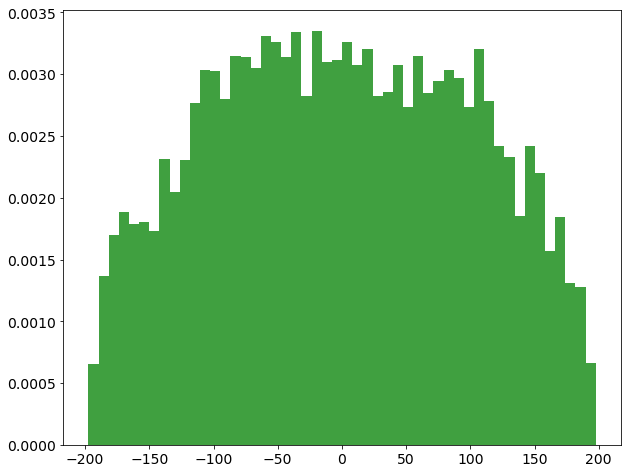

In [34]:
n, bins, patches = plt.hist(X, 50, normed=1, facecolor='g', alpha=0.75)

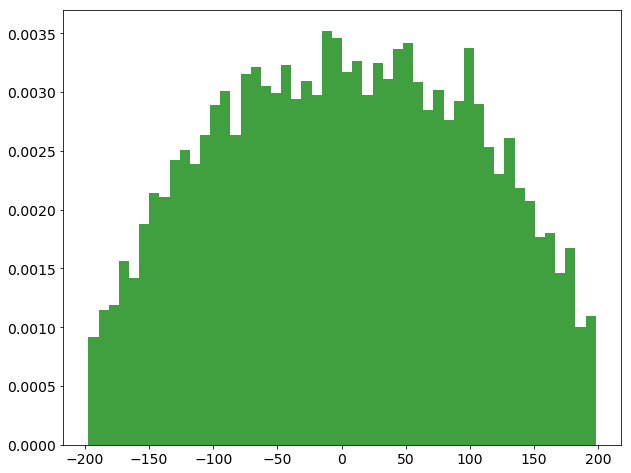

In [35]:
n, bins, patches = plt.hist(Y, 50, normed=1, facecolor='g', alpha=0.75)

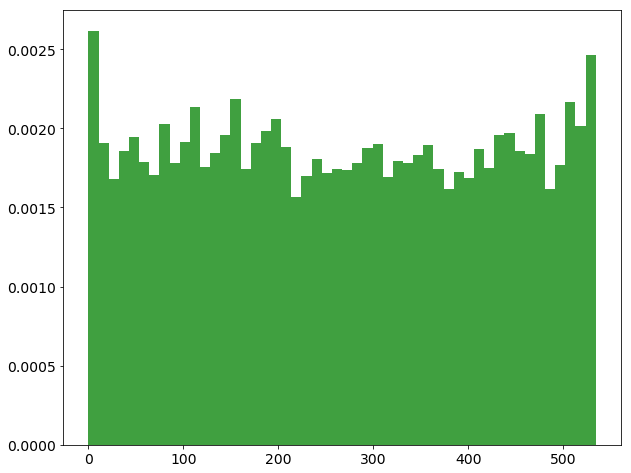

In [36]:
n, bins, patches = plt.hist(Z, 50, normed=1, facecolor='g', alpha=0.75)

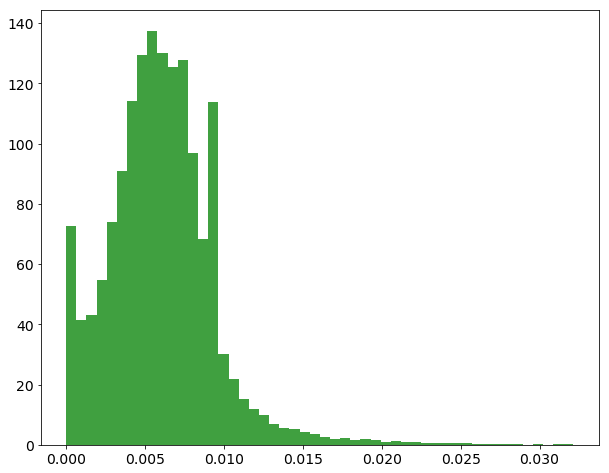

In [37]:
n, bins, patches = plt.hist(E, 50, normed=1, facecolor='g', alpha=0.75)

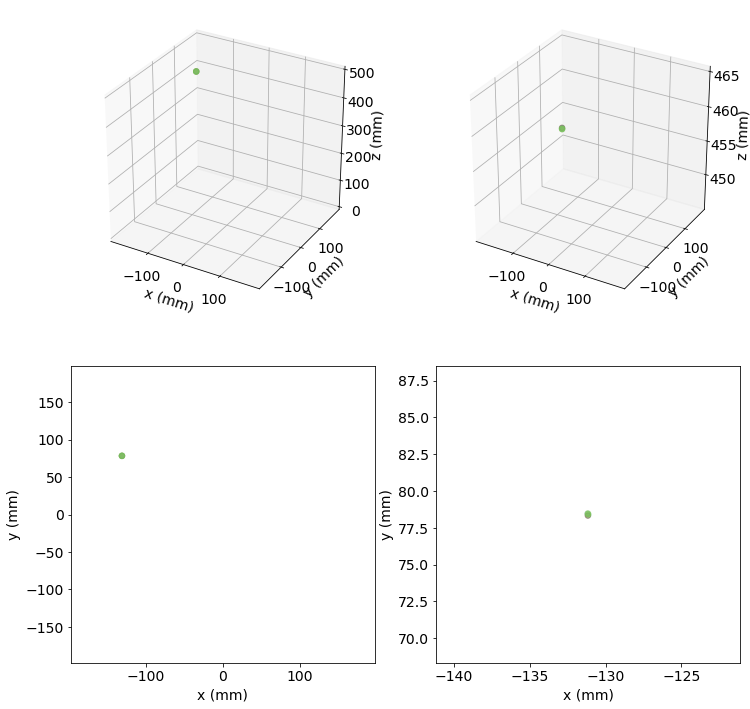

In [40]:
plot_hits_3D(hit_dict[990000])